In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

train  = pd.read_csv("./train.csv")
train.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
592,593,20,RL,60.0,6600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,138000
1222,1223,50,RL,78.0,10496,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,1,2007,WD,Normal,143000
1357,1358,20,RL,NaN,12537,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,149900
498,499,20,RL,65.0,7800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2009,WD,Normal,130000
666,667,60,RL,NaN,18450,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Abnorml,129000


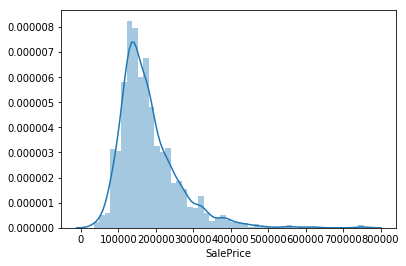

In [21]:
### preprocess ###
sns.distplot(train['SalePrice'])

In [57]:
def highlight_PosCorr(ele):
    #take parameter as a series
    if ele < 1.0 and ele > 0.6:
        return 'background-color: yellow'
    else:
        return ''

In [58]:
corr = train.corr()
corr.style.applymap(highlight_PosCorr)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1,0.0111565,-0.0106007,-0.0332255,-0.0283648,0.0126089,-0.0127127,-0.0219976,-0.0502978,-0.00502405,-0.00596767,-0.0079397,-0.0154146,0.010496,0.00558985,-0.04423,0.00827276,0.00228856,-0.0201547,0.00558745,0.00678381,0.0377186,0.00295124,0.0272387,-0.0197716,7.23902e-05,0.0165697,0.0176338,-0.0296432,-0.000476911,0.00288922,-0.0466348,0.00133021,0.0570439,-0.0062424,0.0211722,0.000711794,-0.0219167
MSSubClass,0.0111565,1,-0.386347,-0.139781,0.0326277,-0.0593158,0.0278501,0.040581,0.0229363,-0.0698357,-0.0656486,-0.140759,-0.238518,-0.251758,0.307886,0.0464738,0.0748532,0.00349103,-0.00233253,0.131608,0.177354,-0.023438,0.281721,0.0403801,-0.0455693,0.0850719,-0.0401098,-0.0986715,-0.0125794,-0.00610012,-0.0120366,-0.0438245,-0.0260302,0.00828271,-0.00768329,-0.0135846,-0.021407,-0.0842841
LotFrontage,-0.0106007,-0.386347,1,0.426095,0.251646,-0.0592135,0.123349,0.0888656,0.193458,0.233633,0.0498997,0.132644,0.392075,0.457181,0.0801773,0.0384685,0.402797,0.100949,-0.0072343,0.198769,0.0535319,0.26317,-0.00606883,0.352096,0.266639,0.0702498,0.285691,0.344997,0.0885209,0.151972,0.0107003,0.0700292,0.0413828,0.206167,0.00336756,0.0112,0.00744959,0.351799
LotArea,-0.0332255,-0.139781,0.426095,1,0.105806,-0.00563627,0.0142277,0.0137884,0.10416,0.214103,0.11117,-0.00261836,0.260833,0.299475,0.0509859,0.00477897,0.263116,0.158155,0.0480456,0.126031,0.0142595,0.11969,-0.0177839,0.190015,0.271364,-0.0249474,0.154871,0.180403,0.171698,0.0847738,-0.0183397,0.0204228,0.0431604,0.0776724,0.0380677,0.00120499,-0.0142614,0.263843
OverallQual,-0.0283648,0.0326277,0.251646,0.105806,1,-0.0919323,0.572323,0.550684,0.411876,0.239666,-0.0591187,0.308159,0.537808,0.476224,0.295493,-0.0304293,0.593007,0.111098,-0.0401502,0.5506,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.0303706,0.0648864,0.0651658,-0.0314062,0.0708152,-0.0273467,0.790982
OverallCond,0.0126089,-0.0593158,-0.0592135,-0.00563627,-0.0919323,1,-0.375983,0.0737415,-0.128101,-0.0462309,0.0402292,-0.136841,-0.171098,-0.144203,0.0289421,0.0254943,-0.0796859,-0.0549415,0.117821,-0.194149,-0.0607693,0.0129801,-0.0870009,-0.0575832,-0.02382,-0.324297,-0.185758,-0.151521,-0.0033337,-0.0325888,0.0703562,0.0255037,0.0548105,-0.00198494,0.0687768,-0.00351084,0.0439497,-0.0778559
YearBuilt,-0.0127127,0.0278501,0.123349,0.0142277,0.572323,-0.375983,1,0.592855,0.315707,0.249503,-0.0491068,0.14904,0.391452,0.281986,0.0103077,-0.183784,0.19901,0.187599,-0.0381618,0.468271,0.242656,-0.0706512,-0.1748,0.0955891,0.147716,0.825667,0.53785,0.478954,0.22488,0.188686,-0.387268,0.0313545,-0.0503644,0.00494973,-0.0343831,0.0123985,-0.0136177,0.522897
YearRemodAdd,-0.0219976,0.040581,0.0888656,0.0137884,0.550684,0.0737415,0.592855,1,0.179618,0.128451,-0.0677585,0.181133,0.291066,0.240379,0.140024,-0.0624191,0.287389,0.11947,-0.012337,0.439046,0.183331,-0.0405809,-0.149598,0.19174,0.112581,0.642277,0.420622,0.3716,0.205726,0.226298,-0.193919,0.0452858,-0.03874,0.00582937,-0.0102862,0.02149,0.0357432,0.507101
MasVnrArea,-0.0502978,0.0229363,0.193458,0.10416,0.411876,-0.128101,0.315707,0.179618,1,0.264736,-0.0723188,0.114442,0.363936,0.344501,0.174561,-0.0690709,0.390857,0.0853098,0.0266728,0.276833,0.201444,0.102821,-0.0376103,0.280682,0.24907,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.0187955,0.0614655,0.0117231,-0.0298154,-0.00596472,-0.00820103,0.477493
BsmtFinSF1,-0.00502405,-0.0698357,0.233633,0.214103,0.239666,-0.0462309,0.249503,0.128451,0.264736,1,-0.0501174,-0.495251,0.522396,0.445863,-0.137079,-0.0645026,0.208171,0.649212,0.0674185,

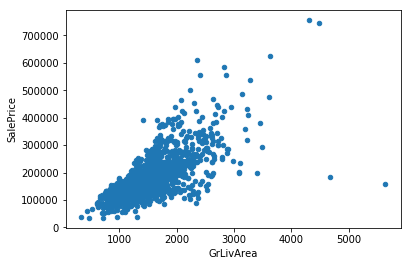

In [59]:
train.plot(kind='scatter', x='GrLivArea',y='SalePrice')

In [101]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
heatMapData = train[cols]

cm = np.corrcoef(heatMapData.values.T)
cm.shape

(10, 10)

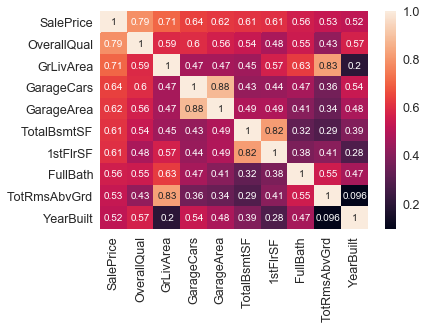

In [96]:
corr_topTen = corr.nlargest(k,'SalePrice')
corr_topTen = corr_topTen[cols]
corr_topTen
#sns.set(font_scale=1.25)
sns.heatmap(corr_topTen,annot = True, cbar = True,annot_kws={'size': 10})